In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import recall_score
import numpy as np
from sklearn import metrics

In [6]:
data = load_iris()
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

data.target_names

In [11]:
data.data.shape

(150, 4)

In [13]:
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,)

In [14]:
knn = KNeighborsClassifier( n_neighbors = 5 )
knn.fit(X,y)

KNeighborsClassifier()

In [15]:
classes = {0:'setosa',1:'versicolor',2:'verginica'}
k_new = [[1,2,3,4],[1.2,2.4,2.8,6]]
y_predict = knn.predict(k_new)
print(y_predict)

[1 1]


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [17]:
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range :
    knn = KNeighborsClassifier( n_neighbors = k )
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_predict)
    scores_list.append(metrics.accuracy_score(y_test,y_predict))

Text(0, 0.5, 'Accuracy')

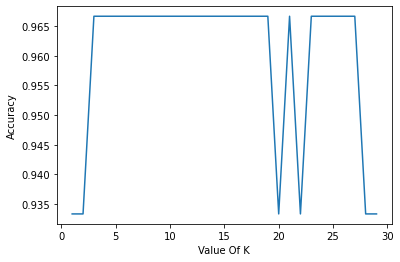

In [18]:
plt.plot(k_range,scores_list)
plt.xlabel('Value Of K')
plt.ylabel('Accuracy')

In [19]:
print(classes[y_predict[0]])

verginica


In [20]:
print(scores[5])

0.9666666666666667


In [21]:
error_rate = 1 - scores [5]
print(error_rate)

0.033333333333333326


In [22]:
sensitivity =  recall_score(y_test, y_predict, average=None)

In [23]:
print(sensitivity)

[1.         0.8        0.88888889]


In [24]:
def perf_measure(y_test, y_predict):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_predict)): 
        if y_test[i]==y_predict[i]==1:
           TP += 1
        if y_predict[i]==1 and y_test[i]!=y_predict[i]:
           FP += 1
        if y_test[i]==y_predict[i]==0:
           TN += 1
        if y_predict[i]==0 and y_test[i]!=y_predict[i]:
           FN += 1
        return(TP, FP, TN, FN)

In [25]:
perf_measure(y_test, y_predict)

(0, 0, 0, 0)

In [26]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])